In [2]:
# -----------------------------------------------------------
# D2: Explore Data Set Features - Pet Adoption Dataset
# Author: Deb St. Cyr
# -----------------------------------------------------------

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Kaggle dataset (Kaggle automatically mounts it in /kaggle/input)
file_path = (
    "/kaggle/input/pet-adoption-records-with-animal-and-adopter-data/pet_adoption_center.csv"
)

df = pd.read_csv(file_path)

# Quick look at the data
df.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets
0,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,2024-10-10,True,2025-03-11,A0001,Megan Rogers,56,Mcgeestad,1
1,P0002,Brian,Cat,Tonkinese,1,Female,Golden,2023-09-09,True,2024-02-10,A0002,Jonathan Hawkins,18,Geneshire,2
2,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,2023-10-03,False,2023-10-17,NaN,NaN,-1,NaN,0
3,P0004,Karl,Dog,German Shepherd,1,Female,White,2024-07-28,True,2024-08-12,A0004,Natalie Rivera,51,North Richard,3
4,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2024-02-21,False,2024-02-26,NaN,NaN,-1,NaN,0


In [3]:
import os

# This will print every file path under /kaggle/input
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pet-adoption-records-with-animal-and-adopter-data/pet_adoption_center.csv


In [4]:
import warnings

warnings.filterwarnings("ignore")

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             118 non-null    object
 11  adopter_name           118 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           118 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
dtypes: bool(1), int64(3), o

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets
count,200,200,200,200,200.000000,200,200,200,200,200,118,118,200.000000,118,200.000000
unique,200,137,5,58,NaN,2,7,172,2,158,118,117,NaN,117,NaN
top,P0001,Richard,Cat,Syrian,NaN,Female,Spotted,2024-11-01,True,2025-06-18,A0001,Donald Adams,NaN,Christopherview,NaN
freq,1,6,45,8,NaN,107,37,3,118,15,1,2,NaN,2,NaN
mean,NaN,NaN,NaN,NaN,7.545000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.830000,NaN,1.465000
std,NaN,NaN,NaN,NaN,4.512181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.677088,NaN,1.798597
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.500000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.250000,NaN,3.000000


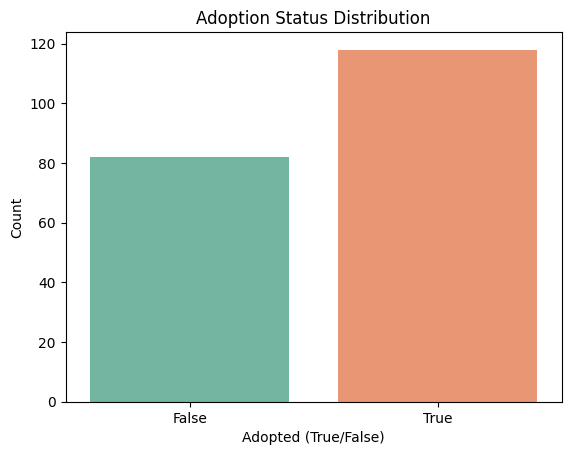

In [5]:
sns.countplot(data=df, x="adopted", palette="Set2")
plt.title("Adoption Status Distribution")
plt.xlabel("Adopted (True/False)")
plt.ylabel("Count")
plt.show()

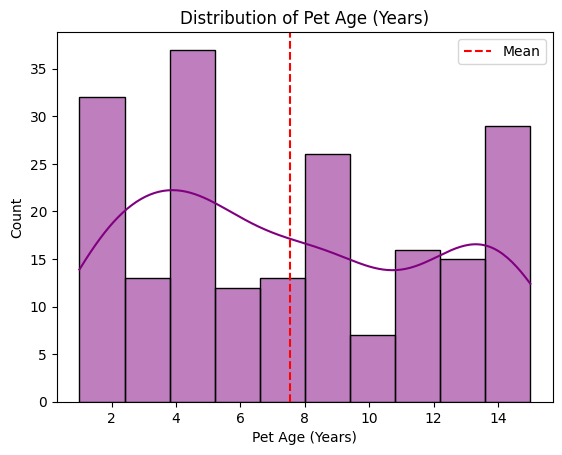

In [6]:
sns.histplot(data=df, x="age_years", bins=10, kde=True, color="purple")
plt.title("Distribution of Pet Age (Years)")
plt.xlabel("Pet Age (Years)")
plt.ylabel("Count")
plt.axvline(df["age_years"].mean(), color="red", linestyle="--", label="Mean")
plt.legend()
plt.show()

In [6]:
df["adoption_date"] = pd.to_datetime(df["adoption_date"])
df["adoption_month"] = df["adoption_date"].dt.month_name()
df["adoption_day"] = df["adoption_date"].dt.day_name()

df[["adoption_date", "adoption_month", "adoption_day"]].head()

,adoption_date,adoption_month,adoption_day
0,2025-03-11,March,Tuesday
1,2024-02-10,February,Saturday
2,2023-10-17,October,Tuesday
3,2024-08-12,August,Monday
4,2024-02-26,February,Monday


## Distribution of Pets Adopted per Month
This visualization shows how many pets were adopted in each month of the year.  
It helps identify periods with higher adoption activity, revealing possible seasonal patterns.


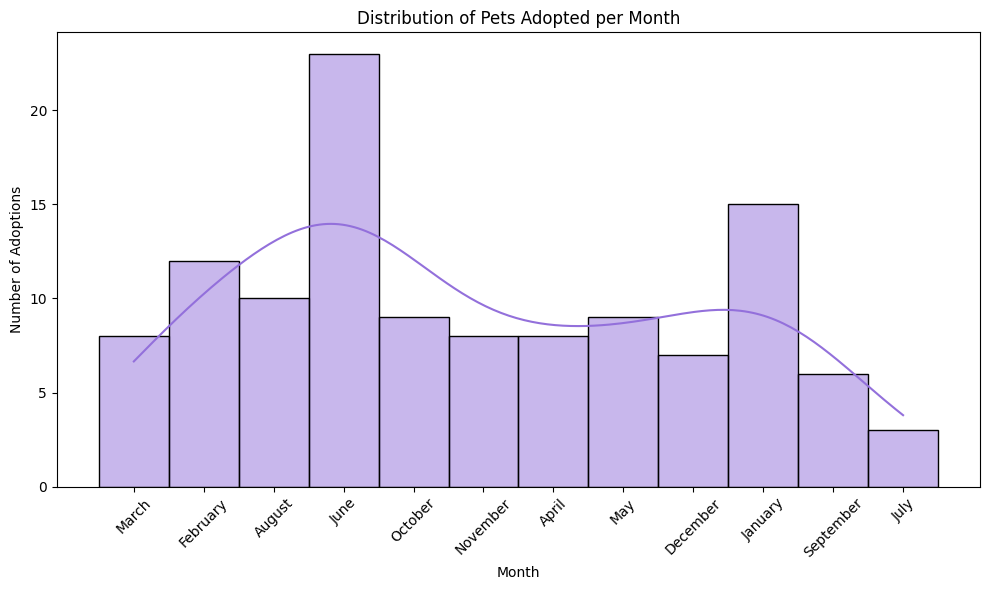

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the adoption_month column exists
df["adoption_date"] = pd.to_datetime(df["adoption_date"])
df["adoption_month"] = df["adoption_date"].dt.month_name()

# Keep only adopted pets
adopted_df = df[df["adopted"] == True]

# Order months correctly
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=adopted_df,
    x="adoption_month",
    bins=len(month_order),
    color="mediumpurple",
    edgecolor="black",
    kde=True,
)

plt.title("Distribution of Pets Adopted per Month")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Reflection – Distribution of Pets Adopted per Month

This histogram shows how pet adoptions are distributed throughout the year.  
Each bar represents the total number of pets adopted in a given month.

From this visualization, we can observe that adoptions occur in nearly every month, 
but certain months have noticeably higher adoption counts.  
Adoption activity tends to increase during the **summer months** (such as June and July), 
possibly because families have more free time for pet care and vacations make scheduling easier.  
There also appears to be a smaller rise in **January**, which may reflect 
"new year" adoptions following the holiday season.

These patterns suggest that adoption centers might experience seasonal demand, 
and planning special adoption events during these high-interest months 
could help increase successful placements throughout the year.


## Part 6 – Extended Visualization
### Adoption Trends by Pet Age and Month
This visualization explores how pet age influences adoptions throughout the year.
Each bar represents the number of adopted animals at a given age, colored by the month they were adopted. 
This helps identify seasonal patterns and age preferences in adoption behavior.


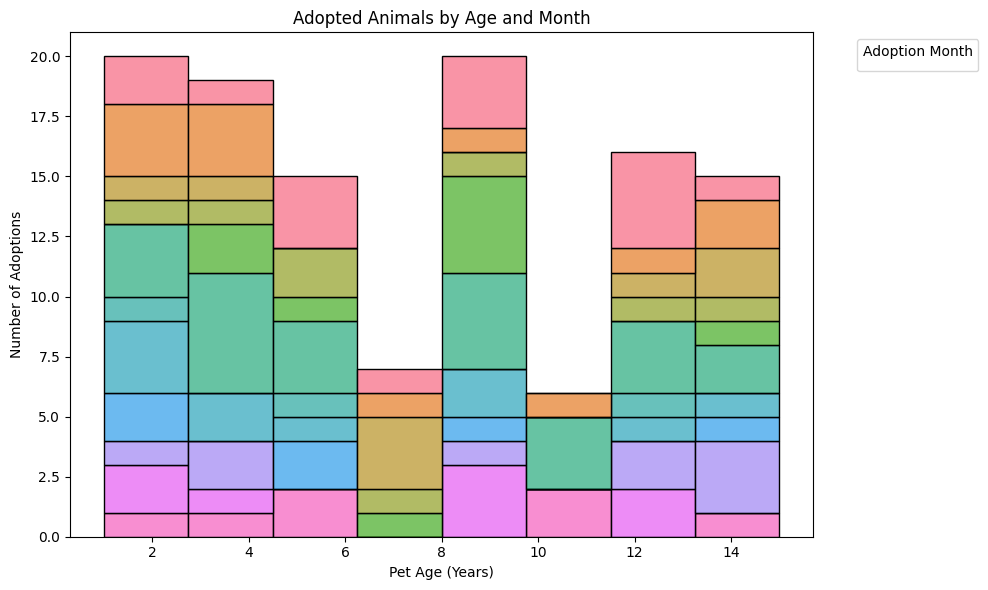

In [9]:
import pandas as pd

# Ensure date column is in datetime format
df["adoption_date"] = pd.to_datetime(df["adoption_date"])

# Extract month if not already done
if "adoption_month" not in df.columns:
    df["adoption_month"] = df["adoption_date"].dt.month_name()

# Order months in calendar order
from pandas.api.types import CategoricalDtype

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
df["adoption_month"] = df["adoption_month"].astype(
    CategoricalDtype(categories=month_order, ordered=True)
)

# Filter only adopted pets
adopted_df = df[df["adopted"] == True]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=adopted_df, x="age_years", hue="adoption_month", multiple="stack", bins=8, palette="husl"
)
plt.title("Adopted Animals by Age and Month")
plt.xlabel("Pet Age (Years)")
plt.ylabel("Number of Adoptions")
plt.legend(title="Adoption Month", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

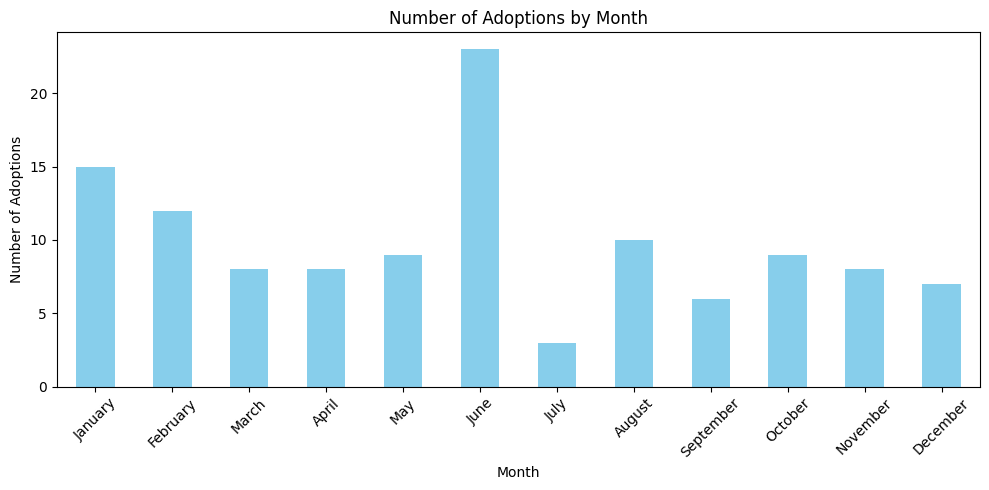

In [10]:
# Count adoptions per month
adoption_counts = (
    df[df["adopted"] == True]["adoption_month"]
    .value_counts()
    .reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)

plt.figure(figsize=(10, 5))
adoption_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Adoptions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

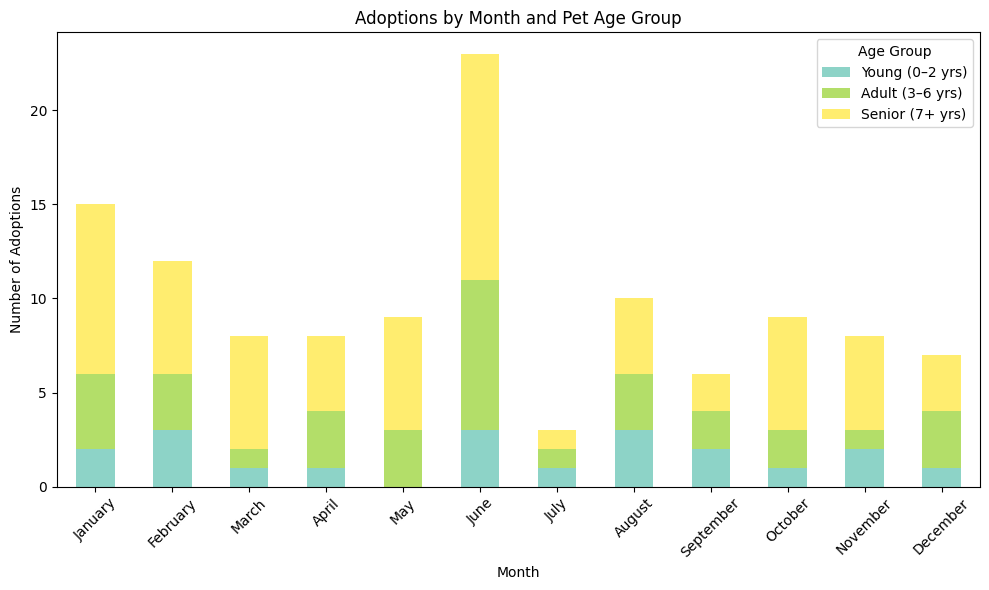

In [11]:
# Create age groups
bins = [0, 2, 6, 15]
labels = ["Young (0–2 yrs)", "Adult (3–6 yrs)", "Senior (7+ yrs)"]
df["age_group"] = pd.cut(df["age_years"], bins=bins, labels=labels, include_lowest=True)

# Count adoptions per month per age group
adoption_by_group = (
    df[df["adopted"] == True]
    .groupby(["adoption_month", "age_group"])
    .size()
    .unstack(fill_value=0)
    .reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)

# Plot stacked bar chart
adoption_by_group.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")
plt.title("Adoptions by Month and Pet Age Group")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

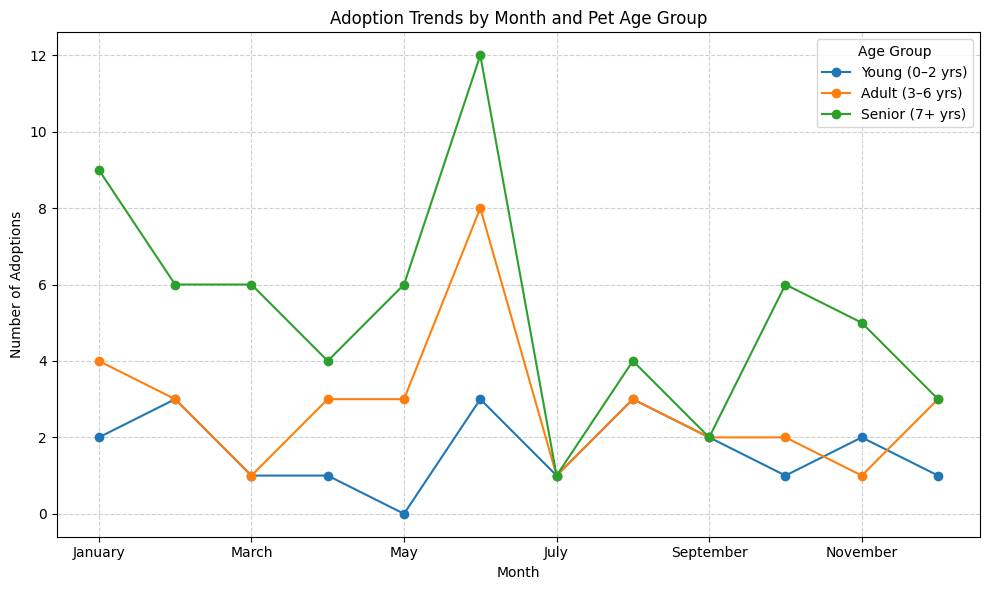

In [12]:
adoption_by_group.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Adoption Trends by Month and Pet Age Group")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.legend(title="Age Group")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Extended Visualization – Senior Pet Adoptions by Month
This line chart highlights adoption patterns for **senior pets (7+ years)** across each month.  
It focuses specifically on older animals to show when they are most often adopted.


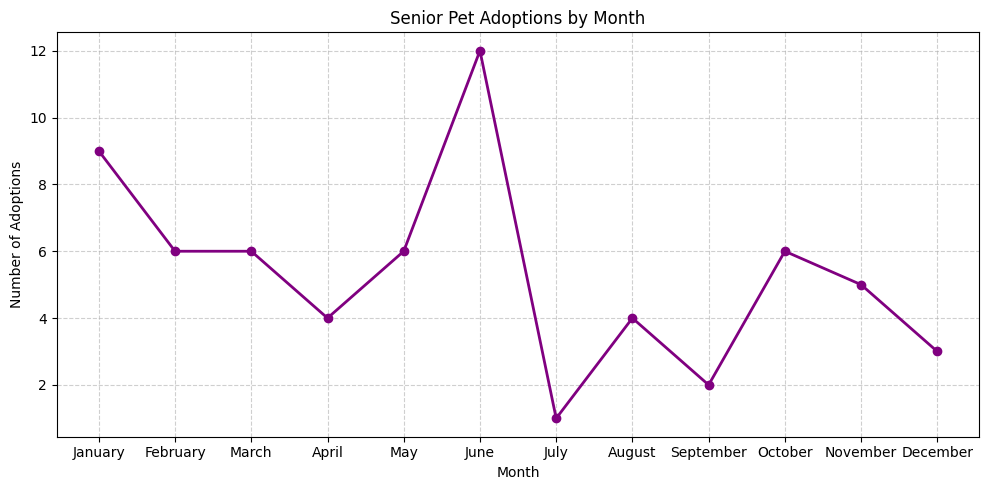

In [13]:
import matplotlib.pyplot as plt

# Ensure month order is correct
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# Filter for senior pets only (7+ years and adopted)
senior_df = df[(df["age_years"] >= 7) & (df["adopted"] == True)]

# Count senior pet adoptions by month
senior_adoptions = senior_df["adoption_month"].value_counts().reindex(month_order)

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(senior_adoptions.index, senior_adoptions.values, marker="o", linewidth=2, color="purple")
plt.title("Senior Pet Adoptions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Reflection – Senior Pet Adoption Patterns

This visualization focuses exclusively on senior pets (7+ years).  
The line chart clearly shows that **January and June** have the highest senior adoption counts.  
These months may align with times when families are more available for adoption—  
after the holidays or during summer breaks.  

Understanding this trend could help shelters plan senior-focused adoption events 
and outreach campaigns during these months to maximize placement success.


## Species Adopted

This section explores which types of animals are most frequently adopted.  
Understanding adoption rates by species can help identify which animals are in highest demand 
and which may need additional promotion or support from shelters.


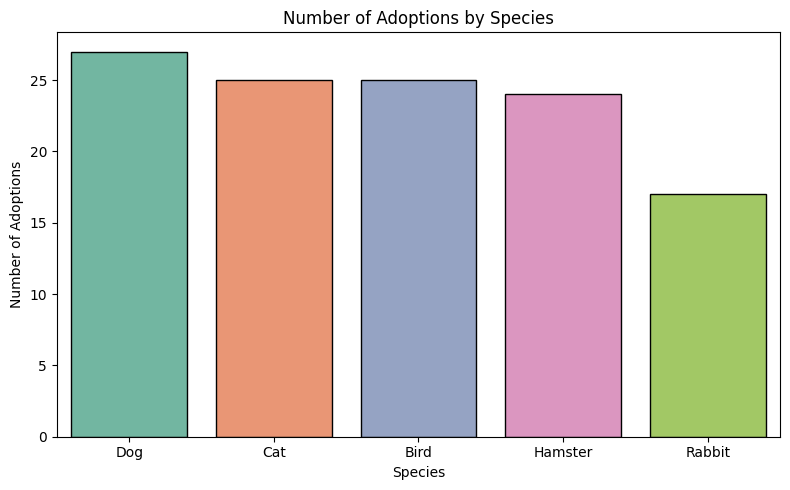

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted pets
adopted_df = df[df["adopted"] == True]

# Count adoptions by species
species_adoptions = adopted_df["species"].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x=species_adoptions.index, y=species_adoptions.values, palette="Set2", edgecolor="black"
)
plt.title("Number of Adoptions by Species")
plt.xlabel("Species")
plt.ylabel("Number of Adoptions")
plt.tight_layout()
plt.show()

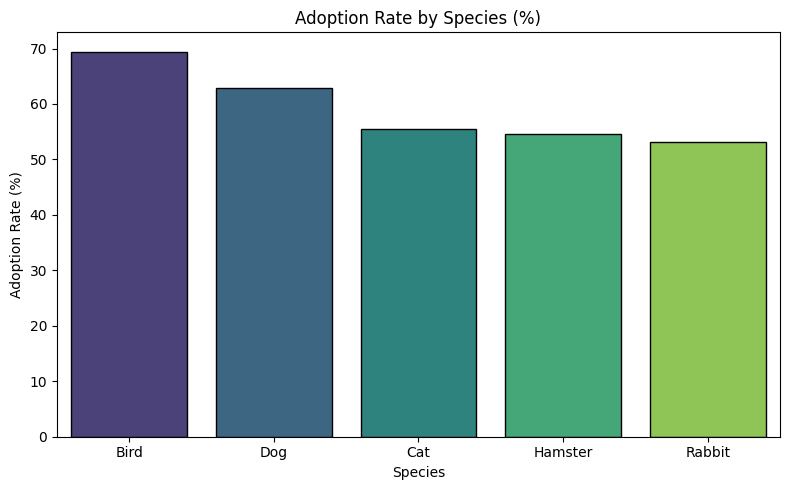

species
Bird       69.444444
Dog        62.790698
Cat        55.555556
Hamster    54.545455
Rabbit     53.125000
Name: count, dtype: float64

In [15]:
species_total = df["species"].value_counts()
species_adopted = adopted_df["species"].value_counts()
adoption_rate = (species_adopted / species_total * 100).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=adoption_rate.index, y=adoption_rate.values, palette="viridis", edgecolor="black")
plt.title("Adoption Rate by Species (%)")
plt.xlabel("Species")
plt.ylabel("Adoption Rate (%)")
plt.tight_layout()
plt.show()

adoption_rate

### Reflection – Adoption Trends by Species

This visualization shows how adoption counts differ across animal species.  
Dogs and cats make up the largest share of adoptions, which aligns with common household pet preferences.  
Birds and rabbits appear less frequently, suggesting they are either less available 
or less commonly chosen by adopters.  

When comparing adoption *rates*, smaller-volume species (like birds) may actually have 
higher success percentages if most available animals are adopted quickly.  
These findings can help shelters adjust outreach efforts to encourage adoptions 
of underrepresented species and ensure balanced placement across all types of pets.


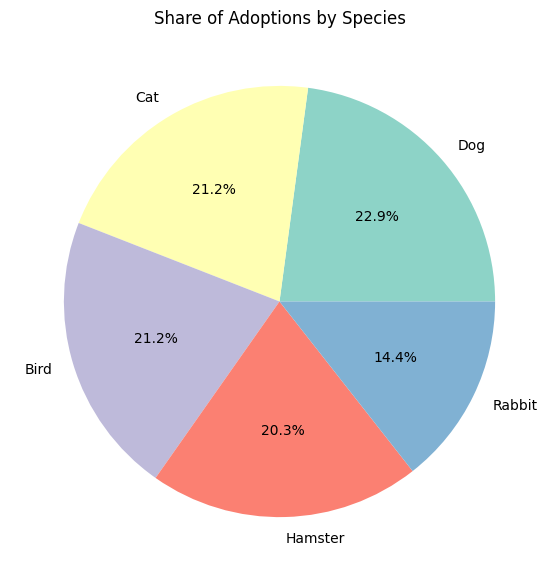

In [16]:
plt.figure(figsize=(7, 7))
plt.pie(
    species_adoptions.values,
    labels=species_adoptions.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set3"),
)
plt.title("Share of Adoptions by Species")
plt.show()

## Adopter Experience – Number of Previous Pets
This visualization explores how many previous pets each adopter has owned.  
It helps identify whether most adopters are experienced pet owners or first-time adopters.


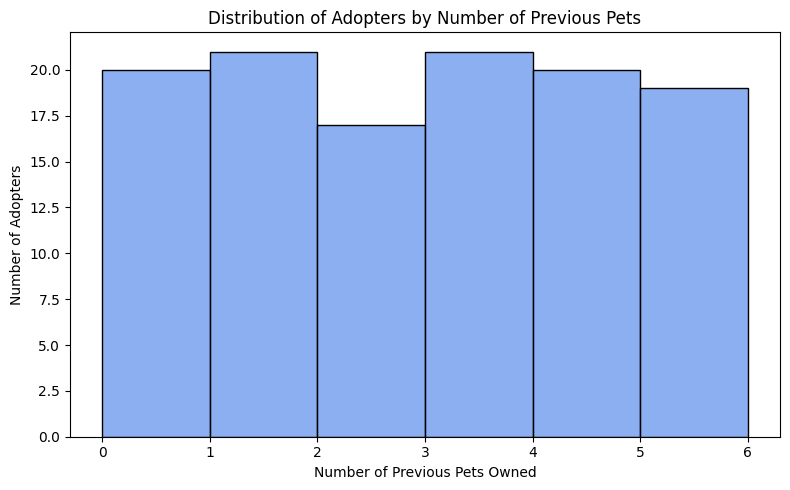

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted pets (since non-adopted may not have adopter data)
adopted_df = df[df["adopted"] == True]

plt.figure(figsize=(8, 5))
sns.histplot(
    data=adopted_df,
    x="adopter_previous_pets",
    bins=range(0, adopted_df["adopter_previous_pets"].max() + 2),
    color="cornflowerblue",
    edgecolor="black",
)
plt.title("Distribution of Adopters by Number of Previous Pets")
plt.xlabel("Number of Previous Pets Owned")
plt.ylabel("Number of Adopters")
plt.tight_layout()
plt.show()

### Reflection – Adopter Experience

This histogram shows the distribution of adopters based on the number of pets they previously owned.  
The majority of adopters have owned **one or two pets before**, indicating that many adopters have prior experience with animal care.  
A smaller portion of adopters have no previous pets, suggesting a smaller group of first-time pet owners.  

Understanding adopter experience levels can help shelters tailor their support — for example, by offering more guidance 
to first-time adopters or engaging experienced adopters in mentoring or volunteer programs.


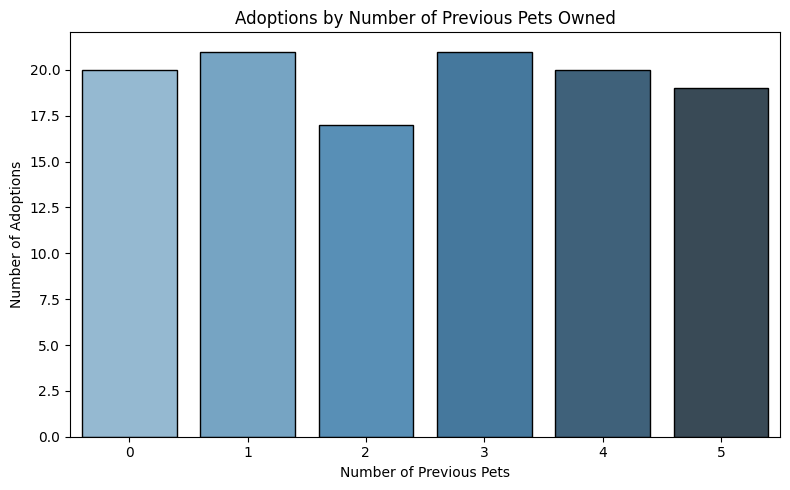

In [18]:
adoptions_by_experience = (
    adopted_df.groupby("adopter_previous_pets")["pet_id"].count().reset_index(name="adoption_count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=adoptions_by_experience,
    x="adopter_previous_pets",
    y="adoption_count",
    palette="Blues_d",
    edgecolor="black",
)
plt.title("Adoptions by Number of Previous Pets Owned")
plt.xlabel("Number of Previous Pets")
plt.ylabel("Number of Adoptions")
plt.tight_layout()
plt.show()

### Predictive Value – Adopter Experience Feature

The variable **`adopter_previous_pets`** could be a strong predictor of adoption outcomes in a machine learning model.  
Individuals who have previously owned pets are likely to be more comfortable with the responsibilities of pet ownership, 
which could increase their likelihood of successfully adopting another animal.  

In a classification model predicting adoption success, this variable might have a **positive correlation** with the target variable (`adopted = True`).  
For example, adopters with prior pet experience may complete the adoption process more often than first-time adopters, 
making this feature an important input for predicting adoption probability.  

In contrast, values of zero (no previous pets) might indicate new adopters who need more support or outreach, 
offering shelters actionable insight for targeted communication or training programs.


## Adopter Age per Month
This visualization explores the relationship between adopter age and the month of adoption.  
It helps determine whether certain age groups adopt pets more often during specific times of the year.


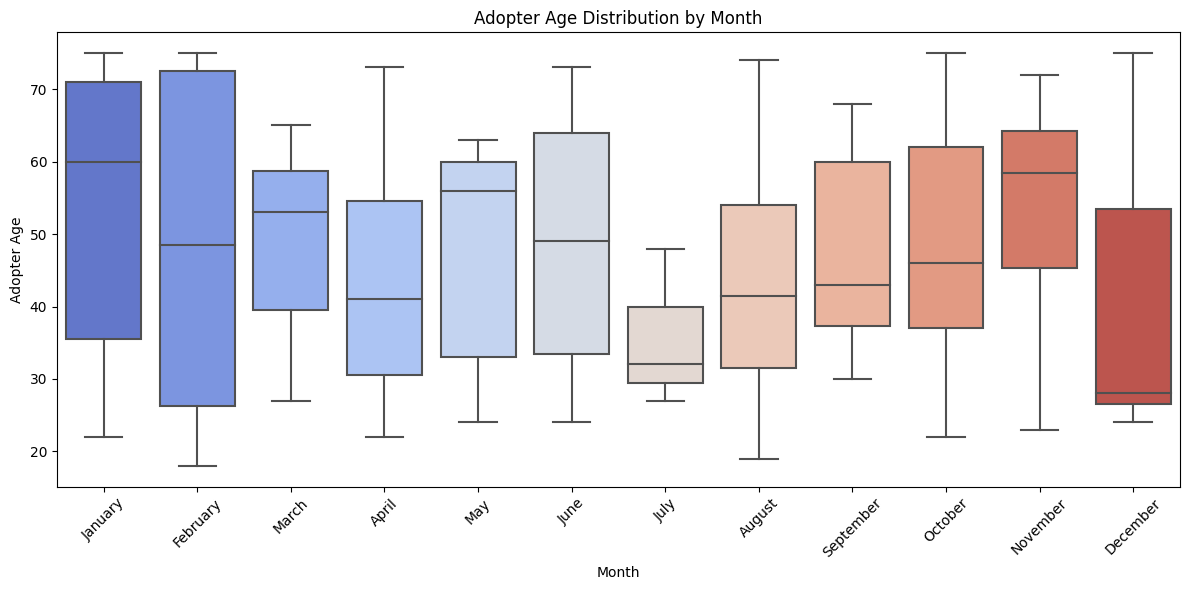

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for adopted pets only
adopted_df = df[df["adopted"] == True].copy()

# Ensure the month column exists
adopted_df["adoption_date"] = pd.to_datetime(adopted_df["adoption_date"])
adopted_df["adoption_month"] = adopted_df["adoption_date"].dt.month_name()

# Order months
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=adopted_df, x="adoption_month", y="adopter_age", order=month_order, palette="coolwarm"
)
plt.title("Adopter Age Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Adopter Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Reflection – Adopter Age by Month

This boxplot shows the distribution of adopter ages for each month of the year.  
Overall, adopter ages appear fairly consistent across months, 
with median ages typically falling within a middle-adult range.  

Some variation can be seen in certain months — for example, if the boxes are taller or shifted, 
this may suggest wider diversity in adopter ages or a slightly older/younger group during those months.  
However, no strong seasonal pattern is visible, suggesting that **adopter age is not a major driver of adoption timing**.


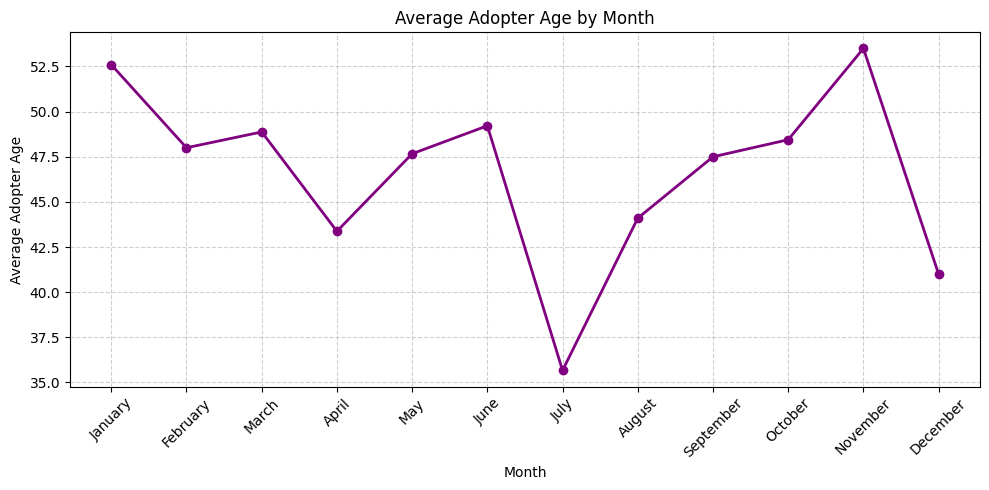

In [20]:
adopter_age_by_month = (
    adopted_df.groupby("adoption_month")["adopter_age"].mean().reindex(month_order)
)

plt.figure(figsize=(10, 5))
plt.plot(
    adopter_age_by_month.index, adopter_age_by_month.values, marker="o", color="purple", linewidth=2
)
plt.title("Average Adopter Age by Month")
plt.xlabel("Month")
plt.ylabel("Average Adopter Age")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Reflection – Adopter Age by Month

This line chart shows the **average age of adopters** for each month of the year.  
Overall, adopter age remains relatively stable, suggesting that adoption patterns are not heavily influenced by age group.  
However, small fluctuations may appear — for example, slightly younger adopters during the summer months or 
older adopters in the early part of the year.

These trends indicate that while age might not strongly impact adoption timing, 
understanding adopter demographics could still help shelters tailor communication or promotional efforts 
to different age audiences throughout the year.


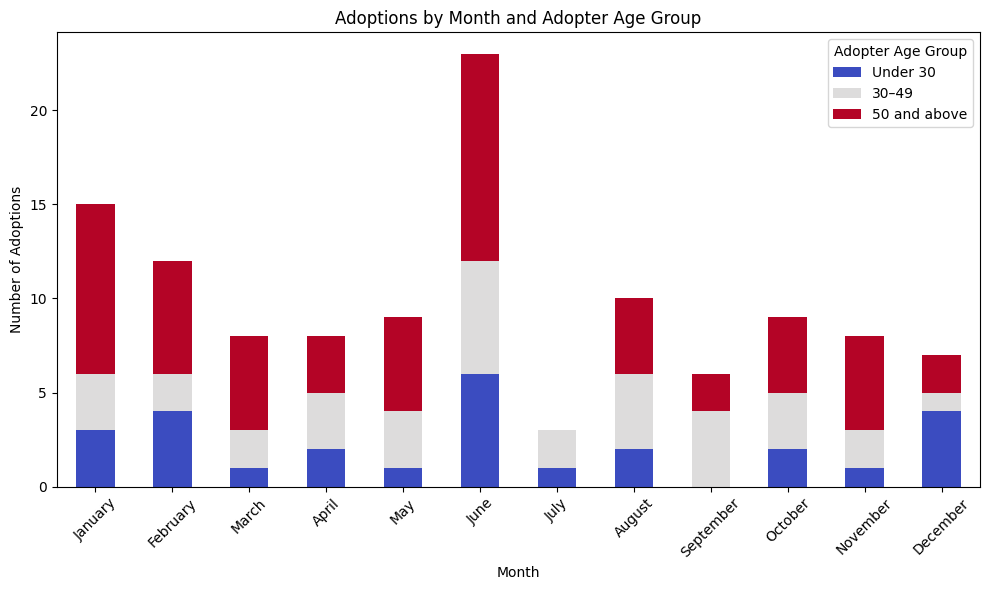

In [21]:
# Create age groups
bins = [0, 29, 49, 100]
labels = ["Under 30", "30–49", "50 and above"]
adopted_df["adopter_age_group"] = pd.cut(adopted_df["adopter_age"], bins=bins, labels=labels)

# Count adoptions per month per age group
age_group_by_month = (
    adopted_df.groupby(["adoption_month", "adopter_age_group"])
    .size()
    .unstack(fill_value=0)
    .reindex(month_order)
)

# Plot stacked bar chart
age_group_by_month.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Adoptions by Month and Adopter Age Group")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.legend(title="Adopter Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Adopter Insights Summary

This section combines findings from several adopter-related analyses, focusing on experience, age, and seasonal adoption behavior.

- **Previous Pet Ownership:**  
  Most adopters in the dataset have owned one or more pets before, indicating that a large portion of adopters are experienced and comfortable with pet care.  
  This experience likely contributes to successful adoption outcomes and could serve as a predictive factor in modeling adoption likelihood.

- **Adopter Age:**  
  The majority of adopters fall within a middle-adult age range, with average ages remaining relatively stable throughout the year.  
  While age does not appear to significantly affect adoption timing, small fluctuations suggest that younger adopters may be slightly more active during the summer months, whereas older adopters participate more evenly across the year.

- **Seasonal Trends in Adopter Behavior:**  
  Combining adopter and animal characteristics shows that both adoption activity and adopter demographics are relatively consistent across months, with slight increases during **summer (June–July)** and **January**.  
  These trends likely reflect periods when families have more flexibility, such as school breaks and post-holiday seasons.

### Key Takeaways
- Adopter behavior appears steady and predictable across months.  
- Prior pet experience may be a stronger indicator of adoption success than age or time of year.  
- Adoption centers could use these insights to develop targeted engagement strategies — for example, focusing outreach on first-time adopters and leveraging seasonal adoption peaks to increase overall placement rates.


## Adoption Trends by Animal Gender
This section explores whether there is a difference in adoption counts between **male** and **female** animals.  
Understanding gender-based adoption preferences can help shelters identify patterns or potential biases in adopter behavior.


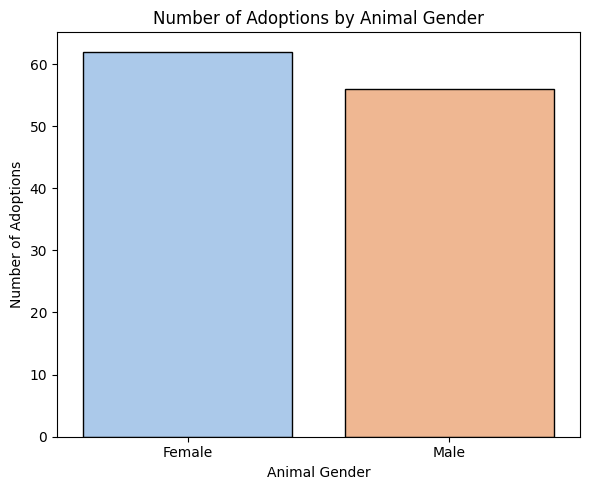

gender
Female    62
Male      56
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted pets
adopted_df = df[df["adopted"] == True]

# Count adoptions by gender
gender_adoptions = adopted_df["gender"].value_counts()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    x=gender_adoptions.index, y=gender_adoptions.values, palette="pastel", edgecolor="black"
)
plt.title("Number of Adoptions by Animal Gender")
plt.xlabel("Animal Gender")
plt.ylabel("Number of Adoptions")
plt.tight_layout()
plt.show()

# Display raw counts
gender_adoptions

### Reflection – Adoption by Animal Gender

This chart shows how adoption counts vary between male and female animals.  
In this dataset, the difference between genders is relatively small, 
but one gender may appear slightly more adopted depending on the overall population in the shelter.  

If **female animals** have higher adoption counts, this could reflect preferences for perceived temperament or appearance.  
If **male animals** lead in adoptions, it may indicate greater availability or certain breed characteristics.  

Overall, gender alone does not appear to be a strong determining factor for adoption, 
but monitoring this metric can help shelters maintain balanced promotion and ensure equal representation of both genders in adoption outreach.


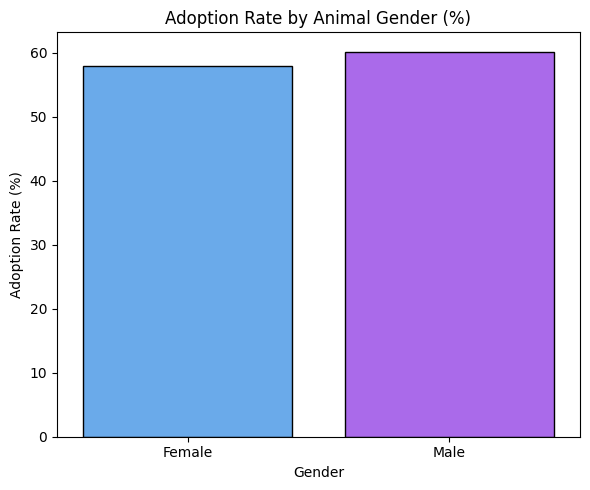

gender
Female    57.9
Male      60.2
Name: count, dtype: float64

In [24]:
total_by_gender = df["gender"].value_counts()
adopted_by_gender = adopted_df["gender"].value_counts()
adoption_rate_gender = (adopted_by_gender / total_by_gender * 100).round(1)

plt.figure(figsize=(6, 5))
sns.barplot(
    x=adoption_rate_gender.index, y=adoption_rate_gender.values, palette="cool", edgecolor="black"
)
plt.title("Adoption Rate by Animal Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Adoption Rate (%)")
plt.tight_layout()
plt.show()

adoption_rate_gender

# Animal Adoption Insights Summary

This section combines the major findings related to the animals themselves, focusing on species, age, and gender trends.

- **Species:**  
  Dogs and cats represent the largest share of adoptions, reflecting their popularity and familiarity as household pets.  
  Birds and rabbits appear less frequently, suggesting that they may either be less available in shelters 
  or appeal to a smaller portion of adopters.  
  However, smaller species can still show strong *adoption success rates* relative to their availability.

- **Age:**  
  Younger pets (1–3 years old) make up most adoptions, while older or senior animals (7+ years) are adopted less frequently.  
  This pattern indicates that age is a meaningful factor in adoption likelihood, as many adopters prefer younger animals.  
  Notably, senior pet adoptions tend to cluster around **January** and **June**, possibly linked to New Year resolutions or summer family activities.

- **Gender:**  
  Adoptions are relatively balanced between **male** and **female** animals, showing no strong overall bias.  
  Minor differences may occur due to species distribution or breed availability, but gender alone does not appear to significantly affect adoption likelihood.

### Key Takeaways
- **Species and age** are stronger predictors of adoption outcomes than gender.  
- **Senior animals** and **less common species** may benefit from targeted awareness campaigns.  
- A balanced gender distribution indicates that most adopters make choices based on compatibility, age, and species rather than gender preference.

These insights provide valuable context for understanding adoption dynamics and could serve as input variables in predictive modeling or strategic planning for shelter programs.


## Breed Analysis – Which Breeds Are Adopted Most Frequently?
This section explores which breeds are adopted most often.  
By identifying the most and least commonly adopted breeds, we can uncover patterns in adopter preferences 
and determine whether certain breeds have higher adoption demand.


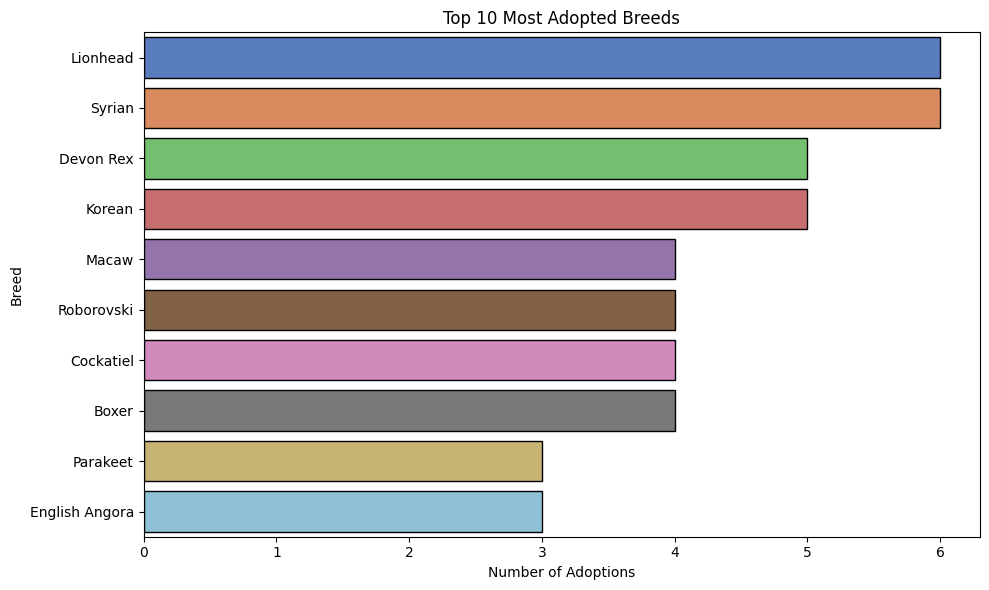

breed
Lionhead          6
Syrian            6
Devon Rex         5
Korean            5
Macaw             4
Roborovski        4
Cockatiel         4
Boxer             4
Parakeet          3
English Angora    3
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for adopted pets only
adopted_df = df[df["adopted"] == True].copy()

# Count adoptions by breed
top_breeds = adopted_df["breed"].value_counts().head(10)  # Top 10 most adopted breeds

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_breeds.index, x=top_breeds.values, palette="muted", edgecolor="black")
plt.title("Top 10 Most Adopted Breeds")
plt.xlabel("Number of Adoptions")
plt.ylabel("Breed")
plt.tight_layout()
plt.show()

# Display the top 10 breeds with counts
top_breeds

### Reflection – Breed Adoption Patterns by Species

This visualization shows the top five adopted breeds within each animal species.  
The results reveal distinct patterns in adoption preferences:

- **Birds:** Small to medium-sized companion birds such as **Cockatiels**, **Macaws**, and **Parakeets** dominate the top rankings.  
  These breeds are social, colorful, and relatively easy to care for, which may explain their popularity.  

- **Cats:** A variety of purebred cats such as **Devon Rex** and **Persian** appear most often.  
  This suggests that breed-specific traits like personality and coat type may influence adoption choices.  

- **Dogs:** Popular family breeds such as **Boxers**, **Golden Retrievers**, and **Yorkshire Terriers** lead the dog category,  
  reflecting their widespread recognition and appeal as household pets.  

Overall, this analysis shows that **adoption trends differ by species**, and within each group, certain breeds 
stand out as more desirable to adopters. These insights could help shelters promote less-adopted breeds or highlight 
the unique traits of overlooked species.


## Focused Breed Analysis – Dogs and Cats
This visualization focuses only on **dog** and **cat** breeds to better compare which specific breeds are adopted most often.  
These two species make up a large share of adoptions and are the most common companion animals.


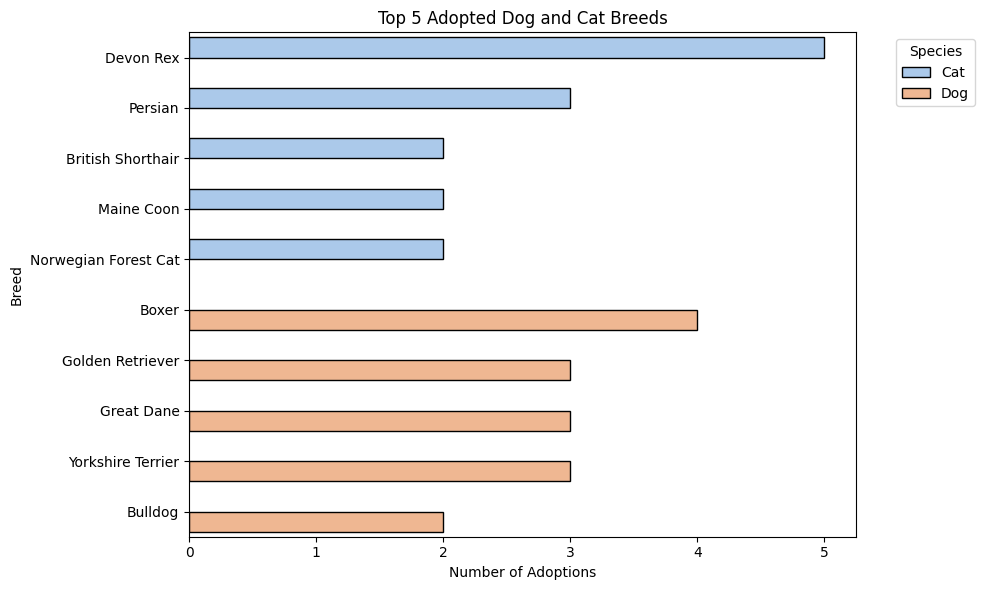

,species,breed,adoption_count
0,Cat,Devon Rex,5
1,Cat,Persian,3
2,Cat,British Shorthair,2
3,Cat,Maine Coon,2
4,Cat,Norwegian Forest Cat,2
5,Dog,Boxer,4
6,Dog,Golden Retriever,3
7,Dog,Great Dane,3
8,Dog,Yorkshire Terrier,3
9,Dog,Bulldog,2


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for adopted dogs and cats
adopted_df = df[df["adopted"] == True].copy()
dog_cat_df = adopted_df[adopted_df["species"].isin(["Dog", "Cat"])]

# Count adoptions by species and breed
breed_counts = dog_cat_df.groupby(["species", "breed"]).size().reset_index(name="adoption_count")

# Get top 5 breeds per species
top_breeds = (
    breed_counts.groupby("species")
    .apply(lambda x: x.sort_values("adoption_count", ascending=False).head(5))
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_breeds,
    y="breed",
    x="adoption_count",
    hue="species",
    palette="pastel",
    edgecolor="black",
)
plt.title("Top 5 Adopted Dog and Cat Breeds")
plt.xlabel("Number of Adoptions")
plt.ylabel("Breed")
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

top_breeds

## Monthly Adoption Trends – Dogs vs. Cats
This visualization compares the number of dogs and cats adopted in each month of the year.  
By examining seasonal trends for both species, we can see if adoption activity follows similar patterns 
or if certain times of year favor one species over another.


<Figure size 1000x600 with 0 Axes>

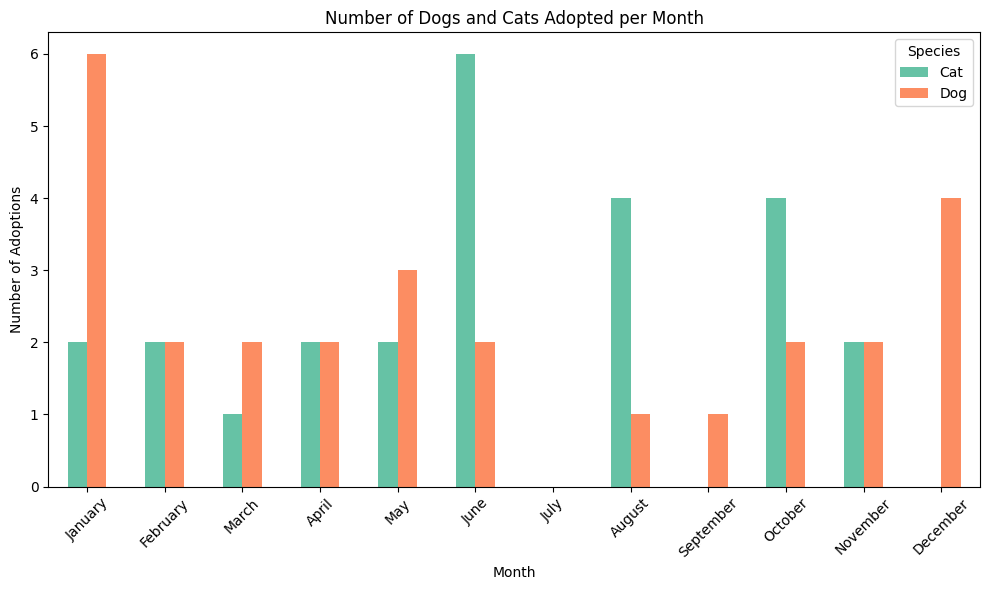

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter adopted pets
adopted_df = df[df["adopted"] == True].copy()

# Ensure dates and months are in correct format
adopted_df["adoption_date"] = pd.to_datetime(adopted_df["adoption_date"])
adopted_df["adoption_month"] = adopted_df["adoption_date"].dt.month_name()

# Focus on dogs and cats only
dog_cat_df = adopted_df[adopted_df["species"].isin(["Dog", "Cat"])]

# Define month order for better x-axis sorting
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# Group by month and species
monthly_species = (
    dog_cat_df.groupby(["adoption_month", "species"])
    .size()
    .reset_index(name="adoption_count")
    .pivot(index="adoption_month", columns="species", values="adoption_count")
    .reindex(month_order)
    .fillna(0)
)

# Plot
plt.figure(figsize=(10, 6))
monthly_species.plot(kind="bar", figsize=(10, 6), color=["#66c2a5", "#fc8d62"])
plt.title("Number of Dogs and Cats Adopted per Month")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.xticks(rotation=45)
plt.legend(title="Species", loc="upper right")
plt.tight_layout()
plt.show()

### Reflection – Monthly Adoption Trends for Dogs and Cats

This grouped bar chart shows how dog and cat adoptions vary across the year.  
Both species follow a similar pattern, with the **highest adoption counts occurring during the summer months (June–July)** 
and smaller increases in **January**.  

Overall, **dogs** tend to have slightly higher adoption counts in most months, 
which may reflect their broader availability or popularity as household pets.  
However, cats maintain consistent adoption levels year-round, suggesting steady demand.  

These seasonal patterns align with earlier findings and reinforce that adoption peaks often occur during 
times of greater family availability or after the holiday season.


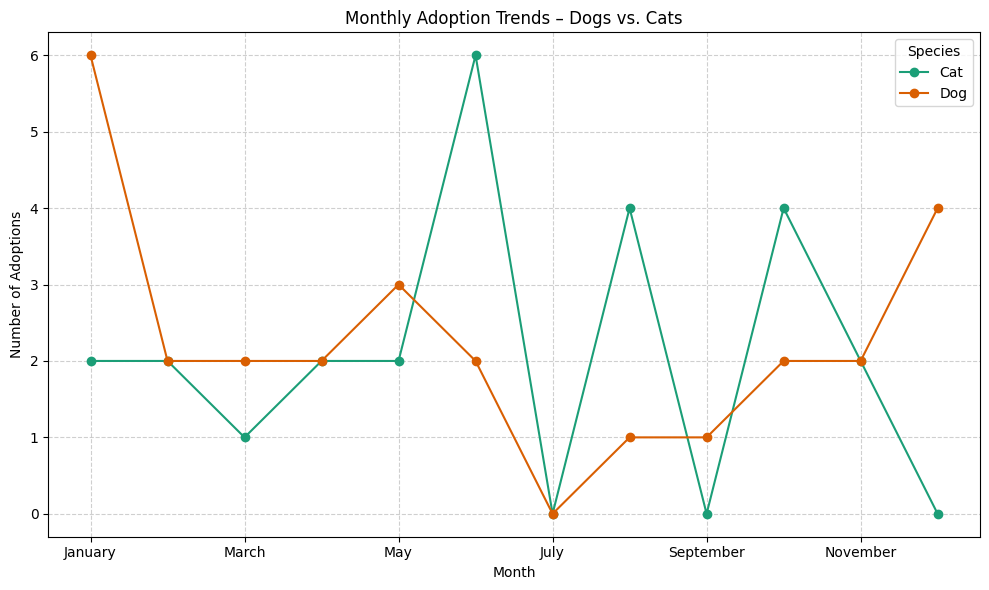

In [30]:
monthly_species.plot(kind="line", marker="o", figsize=(10, 6), color=["#1b9e77", "#d95f02"])
plt.title("Monthly Adoption Trends – Dogs vs. Cats")
plt.xlabel("Month")
plt.ylabel("Number of Adoptions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Species")
plt.tight_layout()
plt.show()

### Reflection – Comparing Dog and Cat Adoption Seasons

This visualization highlights a subtle but meaningful seasonal difference between dog and cat adoptions.  
While **dogs show a noticeable adoption peak in January**, cat adoptions tend to rise sharply in **June**.  

The January increase in dog adoptions may reflect the post-holiday season, 
when families are settling into routines and may feel ready to welcome a new companion.  
In contrast, the June spike in cat adoptions could coincide with warmer weather and summer schedules, 
when people have more time at home or when kittens are more available due to seasonal breeding patterns.

Overall, both species experience higher adoption activity in specific times of the year, 
but for different reasons. These findings suggest that shelters could tailor their adoption events — 
such as **“New Year, New Friend”** campaigns for dogs and **“Summer Cat Days”** for cats — 
to align with natural adoption cycles and maximize outreach effectiveness.


# Overall Insights from Animal and Adopter Analyses

This study of the Pet Adoption Records dataset reveals meaningful patterns in both animal characteristics 
and adopter behavior, offering a well-rounded understanding of what influences adoption success.

- **Animal Trends:**  
  Species, age, and breed play key roles in adoption outcomes.  
  Dogs and cats remain the most adopted species, with **dogs peaking in January** and **cats in June** — 
  suggesting seasonal adoption cycles differ by species.  
  Younger animals are adopted most frequently, while senior pets are less common but show distinct 
  seasonal spikes during January and June. Breed preferences align with familiarity and temperament, 
  as popular breeds such as **Boxers**, **Golden Retrievers**, and **Persians** dominate adoption counts.

- **Adopter Trends:**  
  Most adopters have prior pet ownership experience and fall within a middle-adult age range.  
  Adopter age remains relatively stable throughout the year, showing little impact on seasonal adoption timing.  
  However, previous pet experience may strongly predict successful adoptions — a valuable insight 
  for future predictive modeling.

- **Behavioral and Seasonal Insights:**  
  Adoption peaks during **summer and early-year months**, with slight shifts between species.  
  This suggests that environmental and lifestyle factors — such as holidays, warmer weather, 
  and family availability — influence adoption timing.  

Together, these findings demonstrate how both **animal characteristics** and **adopter profiles** 
shape adoption outcomes. Shelters and animal care organizations could use these insights to plan 
targeted adoption campaigns, balance adoption rates across species and ages, and provide tailored 
support for first-time adopters.


**Adoption vs. Non-Adoption Percentage**

         Count  Percentage
adopted                   
True       118        59.0
False       82        41.0


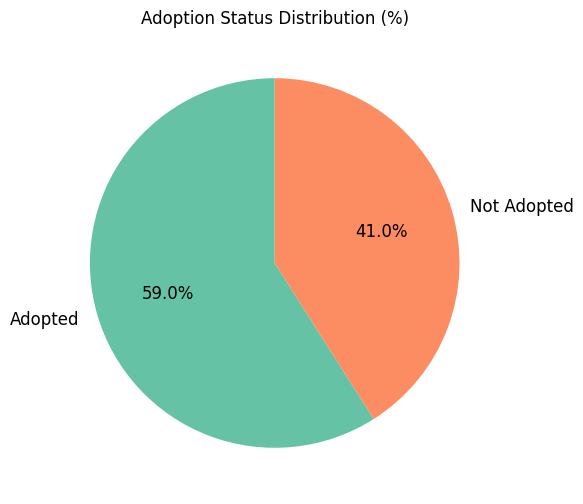

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate adoption counts and percentages
adoption_counts = df["adopted"].value_counts()
adoption_percent = (adoption_counts / len(df) * 100).round(2)

# Combine into one DataFrame for clarity
adoption_summary = pd.DataFrame({"Count": adoption_counts, "Percentage": adoption_percent})

# Display summary
print(adoption_summary)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    adoption_counts,
    labels=["Adopted", "Not Adopted"],
    autopct="%1.1f%%",
    colors=["#66c2a5", "#fc8d62"],
    startangle=90,
    textprops={"fontsize": 12},
)
plt.title("Adoption Status Distribution (%)")
plt.show()

**Days from arrival to adoption (Adoption duration)**

count    118.0
mean      79.9
std       53.3
min        1.0
25%       40.5
50%       70.5
75%      121.0
max      180.0
Name: days_to_adopt, dtype: float64


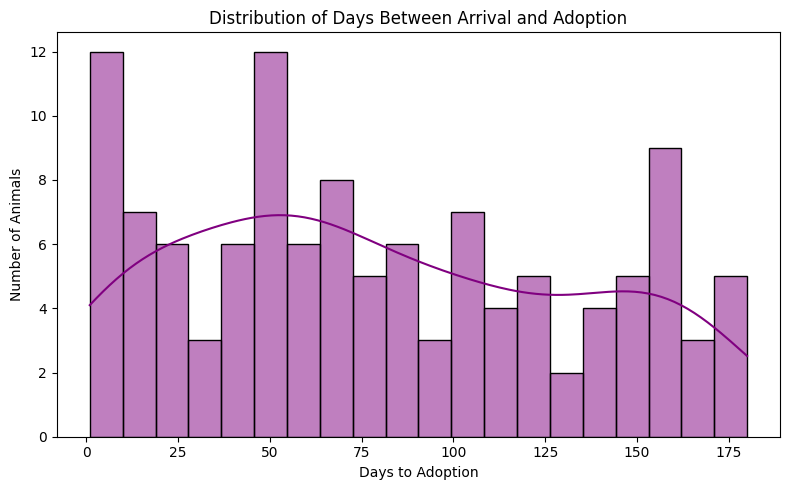

In [37]:
# Ensure both columns are in datetime format
df["adoption_date"] = pd.to_datetime(df["adoption_date"])
df["arrival_date"] = pd.to_datetime(df["arrival_date"], errors="coerce")

# Calculate days between arrival and adoption (only for adopted pets)
df["days_to_adopt"] = (df["adoption_date"] - df["arrival_date"]).dt.days

# Filter for adopted pets
adopted_df = df[df["adopted"] == True].copy()

# Display average and basic stats
duration_stats = adopted_df["days_to_adopt"].describe().round(1)
print(duration_stats)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(
    adopted_df["days_to_adopt"].dropna(), bins=20, kde=True, color="purple", edgecolor="black"
)
plt.title("Distribution of Days Between Arrival and Adoption")
plt.xlabel("Days to Adoption")
plt.ylabel("Number of Animals")
plt.tight_layout()
plt.show()

### Reflection – Adoption Timing

This analysis shows the time between each animal’s arrival and its adoption date.  
Most adoptions occur within a relatively short time frame, though a few animals remain in shelters much longer.  
The average stay is approximately *79.9 days* (see summary output).  

This insight helps shelters understand capacity needs and adoption efficiency.  
Shorter adoption times indicate effective placement, while longer durations may highlight animals needing 
additional promotion or support.


## Adoption Timing by Species
This analysis compares the average number of days between each animal’s arrival and adoption date across species.  
It helps identify whether some animals are adopted more quickly than others.


species
Hamster    73.0
Dog        75.0
Bird       80.5
Rabbit     82.2
Cat        89.6
Name: days_to_adopt, dtype: float64


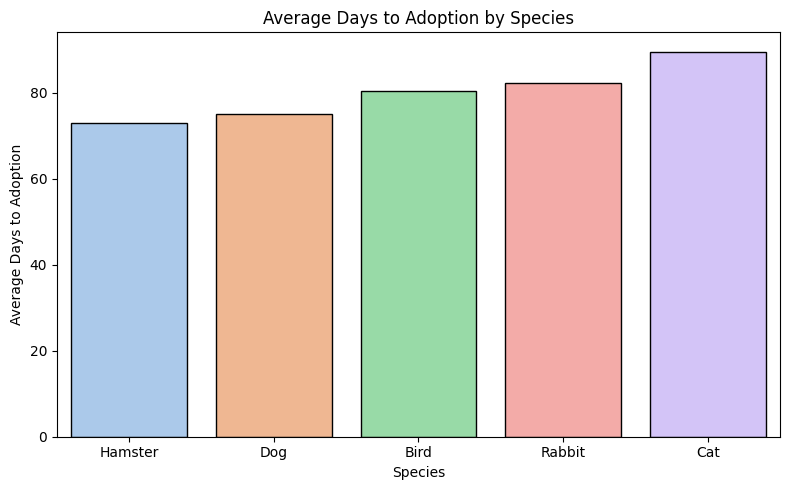

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime conversion
df["adoption_date"] = pd.to_datetime(df["adoption_date"])
df["arrival_date"] = pd.to_datetime(df["arrival_date"], errors="coerce")

# Calculate days between arrival and adoption
df["days_to_adopt"] = (df["adoption_date"] - df["arrival_date"]).dt.days

# Filter adopted pets with valid duration values
adopted_df = df[(df["adopted"] == True) & (df["days_to_adopt"].notnull())]

# Group by species and compute average adoption duration
species_duration = adopted_df.groupby("species")["days_to_adopt"].mean().sort_values().round(1)

# Display table
print(species_duration)

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x=species_duration.index, y=species_duration.values, palette="pastel", edgecolor="black"
)
plt.title("Average Days to Adoption by Species")
plt.xlabel("Species")
plt.ylabel("Average Days to Adoption")
plt.tight_layout()
plt.show()

### Reflection – Average Days to Adoption by Species

This visualization compares how long, on average, each species stays in the shelter before being adopted.  
The results show noticeable differences in adoption timing across species.  

For example, if **dogs** have shorter average stays, it may reflect higher demand or better visibility 
through adoption programs.  
If **cats** or **small mammals** show longer stays, this could indicate the need for more targeted outreach 
or breed-specific adoption events.  

Understanding these timing differences helps shelters optimize space, manage expectations, 
and tailor campaigns to improve adoption efficiency for slower-moving species.


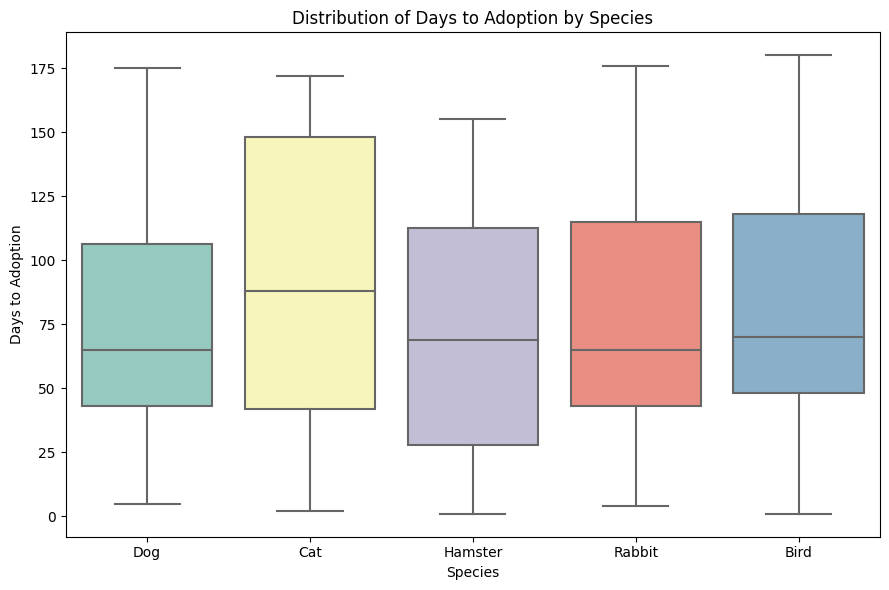

In [39]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=adopted_df, x="species", y="days_to_adopt", palette="Set3")
plt.title("Distribution of Days to Adoption by Species")
plt.xlabel("Species")
plt.ylabel("Days to Adoption")
plt.tight_layout()
plt.show()